## 1. Predict linear relationaship with ML


A linear regression model using PyTorch to predict a linear relationship (y = 2x + 1) with noisy data. We'll visualize the data points, the true line, and the model's predictions using matplotlib. This is a minimal example that's easy to understand and includes a visual output.

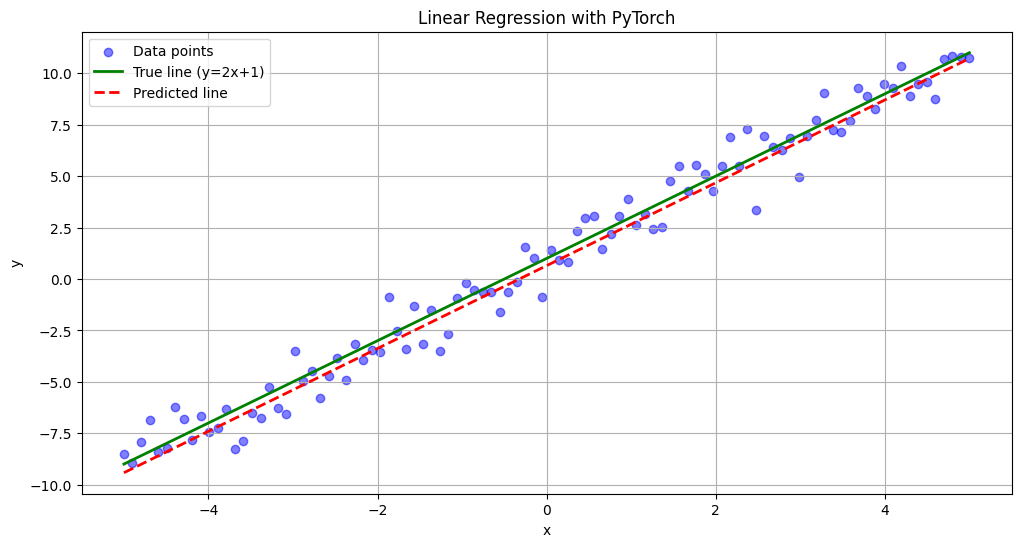

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
x = np.linspace(-5, 5, 100)
y = 2 * x + 1 + np.random.normal(0, 1, x.shape)
x_tensor = torch.FloatTensor(x).reshape(-1, 1)
y_tensor = torch.FloatTensor(y).reshape(-1, 1)

# Define the model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

model = LinearRegression()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()

# Get predictions
model.eval()
with torch.no_grad():
    y_pred = model(x_tensor).numpy()

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(x, y, label='Data points', color='blue', alpha=0.5)
plt.plot(x, 2 * x + 1, label='True line (y=2x+1)', color='green', linewidth=2)
plt.plot(x, y_pred, label='Predicted line', color='red', linestyle='--', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression with PyTorch')
plt.legend()
plt.grid(True)
plt.savefig('linear_regression.png')

## 2. Binary classification

The second simplest machine learning task we can accomplish is a **binary classification** using PyTorch to classify points into two classes based on their position relative to a linear boundary (e.g., y = x). We'll generate synthetic 2D data points, train a simple neural network to classify them, and visualize the data points and the decision boundary using matplotlib. This task builds on the linear regression example by introducing classification, but remains straightforward with a clear visual output.

Here's the Python code using PyTorch:

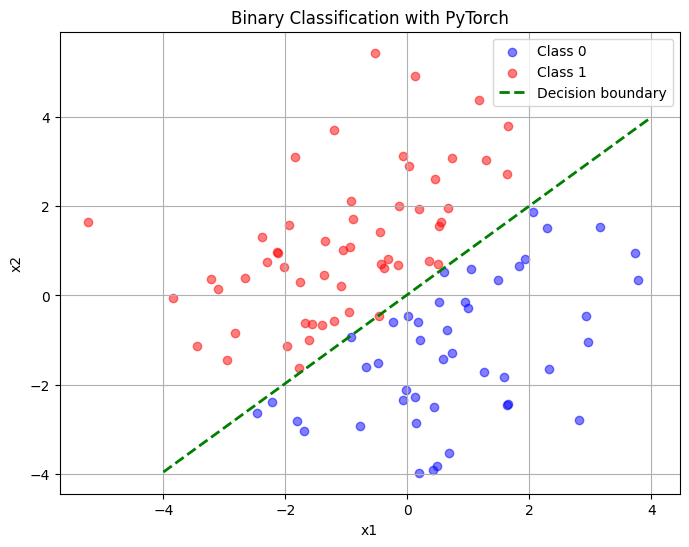

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
n_samples = 100
X = np.random.randn(n_samples, 2) * 2  # 2D points
y = (X[:, 1] > X[:, 0]).astype(float)  # Class 1 if y > x, else Class 0
X_tensor = torch.FloatTensor(X)
y_tensor = torch.FloatTensor(y).reshape(-1, 1)

# Define the model
class BinaryClassifier(nn.Module):
    def __init__(self):
        super(BinaryClassifier, self).__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

model = BinaryClassifier()
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Training loop
epochs = 200
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()

# Get predictions
model.eval()
with torch.no_grad():
    y_pred = (model(X_tensor) > 0.5).float().numpy()

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0', color='blue', alpha=0.5)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1', color='red', alpha=0.5)

# Plot decision boundary
x1 = np.linspace(-4, 4, 100)
with torch.no_grad():
    w = model.linear.weight.numpy()[0]
    b = model.linear.bias.numpy()[0]
    x2 = -(w[0] * x1 + b) / w[1]  # Decision boundary: w1*x1 + w2*x2 + b = 0
plt.plot(x1, x2, label='Decision boundary', color='green', linestyle='--', linewidth=2)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Binary Classification with PyTorch')
plt.legend()
plt.grid(True)
plt.savefig('binary_classification.png')



### Explanation
- **Task**: Classify 2D points into two classes based on whether their y-coordinate is greater than their x-coordinate (i.e., above or below the line y = x).
- **Data**: 100 synthetic 2D points with Gaussian noise, labeled as Class 0 (below y = x) or Class 1 (above y = x).
- **Model**: A single-layer neural network with 2 input features, 1 output, and a sigmoid activation for binary classification.
- **Training**: Uses binary cross-entropy loss (BCELoss) and stochastic gradient descent (SGD) for 200 epochs.
- **Visualization**: Scatter plot of points colored by class, with the learned decision boundary plotted as a line.
- **Output**: Saves a plot (`binary_classification.png`) showing the data points and the decision boundary.

This task is slightly more complex than linear regression but still minimal, introducing classification and a neural network while keeping the code and visualization simple. You can run the code, and it will generate a clear visual of the classified points and the model's decision boundary.

## 3. Sumar 2 numeros usando Machine Learning

This is an excellent introductory example because it demonstrates how a neural network can learn a basic arithmetic operation

In [ ]:
# Machine Learning to Sum Two Numbers
# This script demonstrates how to use a neural network to learn the summation of two numbers.
# We'll use PyTorch to build and train the model, generate synthetic data, and visualize the results.

# Import Libraries
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Step 1: Generate Synthetic Data
# Create pairs of numbers (a, b) and their sums (a + b) with slight noise.
# Generate 1000 pairs of numbers between -10 and 10.
n_samples = 1000
X = np.random.uniform(-10, 10, (n_samples, 2))  # Two numbers per sample
y = X[:, 0] + X[:, 1] + np.random.normal(0, 0.1, n_samples)  # Sum with noise

# Convert to PyTorch tensors
X_tensor = torch.FloatTensor(X)
y_tensor = torch.FloatTensor(y).reshape(-1, 1)

# Visualize a subset of the data
plt.figure(figsize=(6, 4))
plt.scatter(X[:100, 0], X[:100, 1], c=y[:100], cmap='viridis')
plt.colorbar(label='Sum (a + b)')
plt.xlabel('Number a')
plt.ylabel('Number b')
plt.title('Sample Data: Two Numbers and Their Sum')
plt.savefig('data_visualization.png')
plt.close()

# Step 2: Define the Neural Network
# A simple feedforward neural network with one hidden layer:
# - Input layer: 2 neurons (for the two numbers)
# - Hidden layer: 10 neurons with ReLU activation
# - Output layer: 1 neuron (for the sum)
class SumNet(nn.Module):
    def __init__(self):
        super(SumNet, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(2, 10),
            nn.ReLU(),
            nn.Linear(10, 1)
        )

    def forward(self, x):
        return self.layers(x)

model = SumNet()

# Step 3: Set Up Loss and Optimizer
# - Loss: Mean Squared Error (MSE) for regression
# - Optimizer: Stochastic Gradient Descent (SGD)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Step 4: Train the Model
# Train for 1000 epochs, printing loss every 100 epochs
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()  # Clear previous gradients
    outputs = model(X_tensor)  # Forward pass
    loss = criterion(outputs, y_tensor)  # Compute loss
    loss.backward()  # Backward pass
    optimizer.step()  # Update weights

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Step 5: Evaluate and Visualize Results
# Compute predictions and plot true vs. predicted sums
model.eval()
with torch.no_grad():
    y_pred = model(X_tensor).numpy()
y_true = y_tensor.numpy()

# Plot true vs predicted sums
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.5, color='blue')
plt.plot([-20, 20], [-20, 20], 'r--', label='Perfect prediction (y=x)')
plt.xlabel('True Sum')
plt.ylabel('Predicted Sum')
plt.title('True vs Predicted Sums')
plt.legend()
plt.grid(True)
plt.savefig('sum_predictions.png')
plt.close()

# Test a few examples
test_inputs = torch.FloatTensor([[1, 2], [5, -3], [-4, 7]])
with torch.no_grad():
    test_preds = model(test_inputs).numpy()
for i, (a, b) in enumerate(test_inputs):
    print(f'Input: {a:.1f} + {b:.1f}, Predicted Sum: {test_preds[i][0]:.2f}, True Sum: {a+b:.2f}')

# Key Takeaways:
# - Neural networks can learn simple functions like addition.
# - Data preparation: Convert inputs/outputs to tensors.
# - Model: A small network with one hidden layer is sufficient.
# - Loss/Optimization: MSE and SGD are standard for regression.
# - Visualization: Plotting true vs. predicted values assesses performance.

Epoch [100/1000], Loss: 0.1076
Epoch [200/1000], Loss: 0.0536
Epoch [300/1000], Loss: 0.0345
Epoch [400/1000], Loss: 0.0250
Epoch [500/1000], Loss: 0.0193
Epoch [600/1000], Loss: 0.0159
Epoch [700/1000], Loss: 0.0138
Epoch [800/1000], Loss: 0.0124
Epoch [900/1000], Loss: 0.0116
Epoch [1000/1000], Loss: 0.0110
Input: 1.0 + 2.0, Predicted Sum: 2.90, True Sum: 3.00
Input: 5.0 + -3.0, Predicted Sum: 1.99, True Sum: 2.00
Input: -4.0 + 7.0, Predicted Sum: 3.01, True Sum: 3.00


## Sumando Dos Números con Machine Learning: Técnicas Utilizadas
El aprendizaje automático (machine learning, ML) es una herramienta poderosa que puede aplicarse incluso a tareas aparentemente simples, como sumar dos números. En este artículo, exploraremos las técnicas utilizadas en un script de Python que emplea una red neuronal implementada en PyTorch para aprender a sumar dos números. Este ejercicio, aunque sencillo, ilustra conceptos fundamentales de ML, como la preparación de datos, el diseño de modelos, la optimización y la visualización de resultados. También incluiremos una breve explicación sobre los tensores en PyTorch, un componente clave del script. Este artículo está diseñado para estudiantes que desean comprender los fundamentos del aprendizaje automático a través de un ejemplo práctico.
Contexto del Problema
El objetivo es entrenar una red neuronal para que, dado un par de números reales ((a, b)), prediga su suma (a + b). Aunque sumar es una operación aritmética trivial, usar ML para este propósito demuestra cómo las redes neuronales pueden aproximar funciones matemáticas. Para hacer el problema más interesante y realista, se agrega un pequeño ruido a las sumas, simulando imperfecciones en los datos del mundo real. El script genera datos sintéticos, entrena un modelo, evalúa su rendimiento y visualiza los resultados.
Técnicas Utilizadas en el Script
El script utiliza varias técnicas estándar en ML, implementadas con PyTorch, una biblioteca popular para aprendizaje profundo. A continuación, desglosamos cada paso y las técnicas asociadas:
1. Generación de Datos Sintéticos
Técnica: Creación de un conjunto de datos sintético para entrenamiento.

Descripción: Se generan 1000 pares de números ((a, b)) distribuidos uniformemente entre -10 y 10 usando numpy.random.uniform. La salida es la suma (a + b) con un ruido gaussiano ((\sigma = 0.1)) añadido para simular datos imperfectos.
Propósito: Proporcionar un conjunto de datos de entrada-salida que la red neuronal pueda aprender. El ruido asegura que el modelo deba generalizar en lugar de memorizar.
Implementación:X = np.random.uniform(-10, 10, (n_samples, 2))  # Pares de números
y = X[:, 0] + X[:, 1] + np.random.normal(0, 0.1, n_samples)  # Suma con ruido


Visualización: Se crea un gráfico de dispersión con matplotlib para mostrar los pares de números coloreados según su suma, ayudando a entender la distribución de los datos.

2. Preparación de Datos con Tensores
Técnica: Conversión de datos a tensores de PyTorch.

Descripción: Los datos generados (entradas (X) y salidas (y)) se convierten a tensores de PyTorch, que son estructuras de datos optimizadas para cálculos en ML.
Propósito: Los tensores permiten realizar operaciones matriciales eficientes y son compatibles con las GPU para acelerar el entrenamiento.
Implementación:X_tensor = torch.FloatTensor(X)
y_tensor = torch.FloatTensor(y).reshape(-1, 1)



¿Qué es un Tensor en PyTorch?
Un tensor en PyTorch es una estructura de datos multidimensional, similar a un arreglo de NumPy, pero diseñada específicamente para operaciones de aprendizaje automático. Los tensores pueden almacenar escalares, vectores, matrices o arreglos de mayor dimensión y soportan operaciones como suma, multiplicación matricial y cálculo de gradientes automáticos (autograd), que son esenciales para entrenar redes neuronales. En el script, los datos de entrada (pares de números) y salida (sumas) se convierten a tensores de tipo FloatTensor para que PyTorch pueda procesarlos. Por ejemplo, X_tensor es una matriz de forma ([1000, 2]), donde cada fila contiene un par ((a, b)), y y_tensor es una matriz de forma ([1000, 1]), donde cada fila contiene la suma correspondiente.
3. Diseño de la Red Neuronal
Técnica: Construcción de una red neuronal feedforward simple.

Descripción: Se define una clase SumNet que hereda de nn.Module en PyTorch. La red tiene:
Capa de entrada: 2 neuronas (para (a) y (b)).
Capa oculta: 10 neuronas con activación ReLU (para capturar patrones no lineales).
Capa de salida: 1 neurona (para la suma predicha).


Propósito: La red neuronal actúa como un aproximador de funciones que mapea ((a, b)) a (a + b). La capa oculta y la activación ReLU permiten modelar relaciones no lineales, aunque en este caso la suma es lineal.
Implementación:class SumNet(nn.Module):
    def __init__(self):
        super(SumNet, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(2, 10),
            nn.ReLU(),
            nn.Linear(10, 1)
        )
    def forward(self, x):
        return self.layers(x)


Nota: La arquitectura es intencionalmente simple para mantener el ejemplo educativo, pero suficiente para aprender la suma con alta precisión.

4. Definición de la Función de Pérdida y el Optimizador
Técnica: Uso de pérdida de error cuadrático medio (MSE) y optimización por descenso de gradiente estocástico (SGD).

Descripción:
Función de pérdida: Se usa nn.MSELoss para medir la diferencia entre las sumas predichas y las reales. El MSE calcula el promedio de los errores al cuadrado, adecuado para tareas de regresión como esta.
Optimizador: Se emplea SGD (torch.optim.SGD) con una tasa de aprendizaje de 0.01 para actualizar los pesos de la red basándose en los gradientes.


Propósito: La función de pérdida cuantifica el error del modelo, y el optimizador ajusta los parámetros para minimizar este error.
Implementación:criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)



5. Entrenamiento del Modelo
Técnica: Entrenamiento iterativo mediante un bucle de épocas.

Descripción: El modelo se entrena durante 1000 épocas. En cada época:
Se realiza un paso hacia adelante (forward pass) para obtener predicciones.
Se calcula la pérdida comparando las predicciones con las sumas reales.
Se realiza un paso hacia atrás (backward pass) para calcular gradientes.
El optimizador actualiza los pesos.


Propósito: Ajustar los pesos de la red para que las predicciones se acerquen a las sumas reales.
Implementación:epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()


Monitoreo: La pérdida se imprime cada 100 épocas para verificar que el modelo está aprendiendo.

6. Evaluación y Visualización
Técnica: Evaluación del modelo y visualización de resultados.

Descripción:
Se evalúa el modelo en modo de evaluación (model.eval()) para obtener predicciones sin calcular gradientes.
Se compara las sumas predichas con las reales en un gráfico de dispersión, donde un modelo perfecto produciría puntos a lo largo de la línea (y = x).
Se prueban ejemplos específicos (e.g., (1 + 2), (5 + -3)) para mostrar la precisión.


Propósito: Verificar visualmente y numéricamente si el modelo aprendió a sumar correctamente.
Implementación:with torch.no_grad():
    y_pred = model(X_tensor).numpy()
plt.scatter(y_true, y_pred, alpha=0.5)
plt.plot([-20, 20], [-20, 20], 'r--', label='Predicción perfecta')
plt.savefig('sum_predictions.png')



Importancia de los Tensores en PyTorch
Los tensores son fundamentales en PyTorch porque actúan como el contenedor principal para todos los datos y parámetros del modelo. En este script, los tensores permiten:

Almacenar datos: Las entradas ((a, b)) y las salidas (sumas) se representan como tensores, facilitando operaciones matriciales.
Calcular gradientes: PyTorch rastrea las operaciones sobre tensores para calcular gradientes automáticamente, lo que es crucial para el entrenamiento.
Aceleración por hardware: Los tensores pueden transferirse a GPUs para cálculos más rápidos, aunque en este ejemplo simple no es necesario.

Por ejemplo, al convertir los datos de NumPy a tensores (torch.FloatTensor), aseguramos que PyTorch pueda procesarlos eficientemente y calcular gradientes durante el paso hacia atrás. La forma de los tensores (e.g., ([1000, 2]) para entradas) es crítica para que las dimensiones coincidan con la arquitectura de la red.
Lecciones Aprendidas
Este ejercicio, aunque sencillo, encapsula los pasos esenciales de un proyecto de ML:

Preparación de datos: Generar y formatear datos adecuados.
Diseño del modelo: Crear una red neuronal apropiada para la tarea.
Entrenamiento: Optimizar los parámetros usando pérdida y gradientes.
Evaluación: Visualizar y verificar los resultados.

El uso de una red neuronal para sumar números puede parecer excesivo, pero ilustra cómo las redes pueden aprender funciones arbitrarias. Este enfoque es escalable a problemas más complejos, como los explorados en otros ejercicios (regresión lineal, clasificación binaria, reconocimiento de dígitos).
Conclusión
El script para sumar dos números con ML demuestra técnicas clave del aprendizaje automático: generación de datos, uso de tensores, diseño de redes neuronales, optimización y visualización. PyTorch facilita estas tareas con su manejo eficiente de tensores y su capacidad para calcular gradientes automáticamente. Este ejemplo es un punto de partida ideal para estudiantes, ya que combina simplicidad con conceptos fundamentales que se aplican a problemas más avanzados. Al estudiar este script, los aprendices pueden experimentar con modificaciones (e.g., cambiar la arquitectura o el ruido) para profundizar su comprensión del aprendizaje automático.
